Morphological operators are sets of Kernels that can achieve a variety of effects, such as reducing noise.

Certain operators are very good at reducing black points on a white background.

Certain operators can also achieve an erosion and dilatioin effect that can add or erode from an existing image.

This effect is mostly seen on text data,so we will practise various morphological operators on some simple white text on a black background.

In [1]:
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text = "ABCDE", org = (50,300), fontFace = font,
               fontScale = 5, color = (255,255,255), thickness = 25)
    return blank_img

In [6]:
def display_img(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

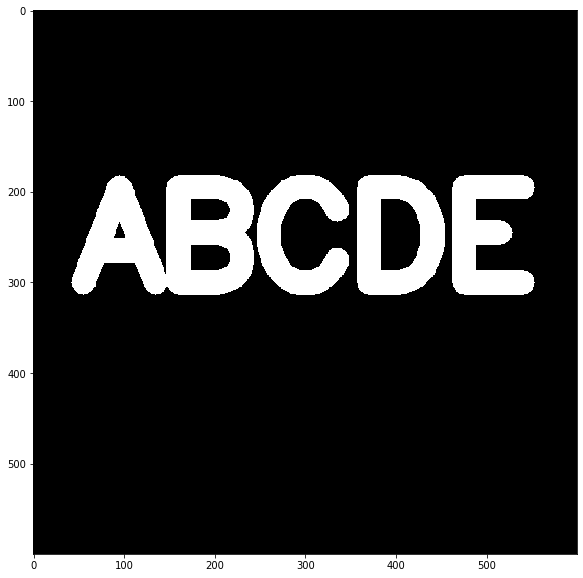

In [7]:
img = load_img()
display_img(img)

**EROSION**

Erodes the boundary of foreground objects.

In [26]:
kernel = np.ones((5,5), dtype = np.uint8)

In [27]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [28]:
result = cv2.erode(img,kernel, iterations = 4)

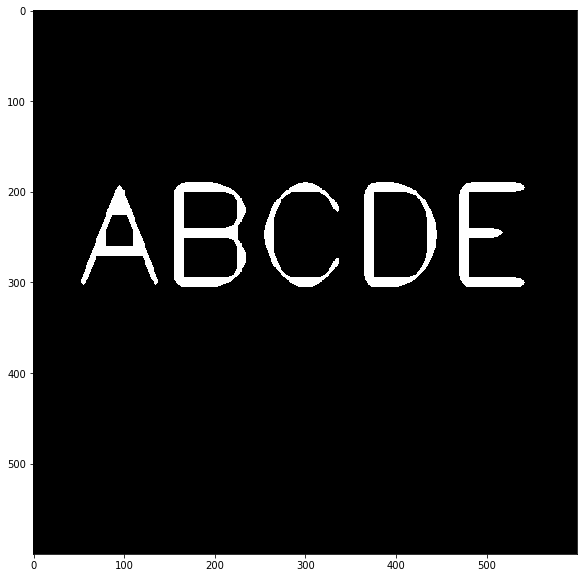

In [29]:
display_img(result)

**OPENING**

Opening is erosion followed by dilation.It can be used to remove noises. 

In [30]:
# We are putting some noise on the original image.
img = load_img()

In [31]:
white_noise = np.random.randint(low = 0, high = 2, size = (600,600))

In [32]:
white_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1]])

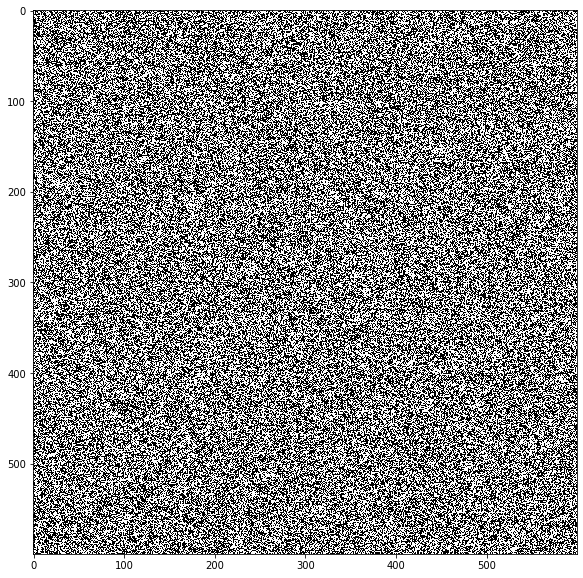

In [33]:
display_img(white_noise)

In [34]:
# Now  we will put this noise in our original image.


In [35]:
white_noise = white_noise * 255
# This is done so that the values in noise are either 255 or 0 as in the original image.

In [36]:
white_noise

array([[  0,   0,   0, ...,   0, 255,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ..., 255,   0, 255],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [255,   0, 255, ...,   0,   0, 255],
       [  0, 255,   0, ..., 255,   0, 255]])

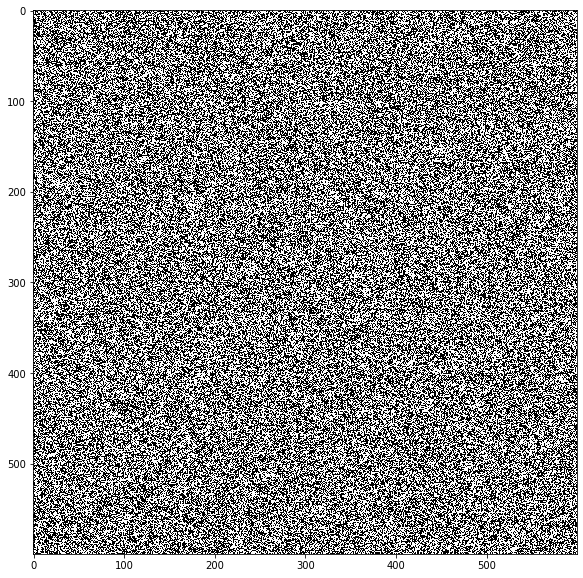

In [37]:
display_img(white_noise)

In [38]:
noise_img = white_noise + img

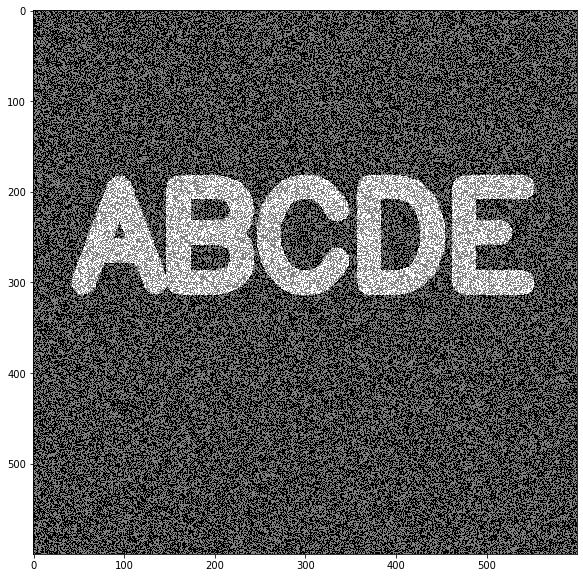

In [39]:
display_img(noise_img)

So, the image above has lot of noise.. so we will try to remove this noise from the original image.

In [40]:
# Using the morphology function.
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

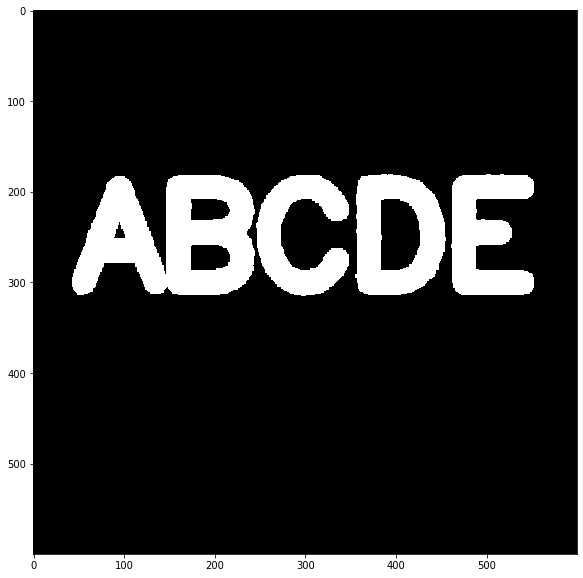

In [41]:
display_img(opening)

Now here, if we compare the above pic with the original one, we will notice that this image has still noise....for example... notice the corners of the letters here which are more noisy.


So, opening wasn't able to clean the image completely.

In [42]:
####################################################
####################################################
### These images had background noises, so lets ####
### see what if we have the foreground noises.  ####
####################################################
####################################################

In [43]:
img2 = load_img()

In [44]:
black_noise = np.random.randint(low = 0, high = 2,size = (600,600))
# Here the upper limit is taken as 2 because it is exclusive.
                                

In [45]:
black_noise

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1]])

In [46]:
black_noise = black_noise * -255

In [47]:
black_noise

array([[-255,    0, -255, ...,    0,    0,    0],
       [-255, -255, -255, ..., -255, -255,    0],
       [   0,    0,    0, ..., -255, -255, -255],
       ...,
       [   0, -255,    0, ..., -255, -255,    0],
       [   0,    0, -255, ...,    0,    0,    0],
       [   0, -255,    0, ...,    0,    0, -255]])

In [48]:
black_noise_img = img2 + black_noise

In [49]:
black_noise_img

array([[-255.,    0., -255., ...,    0.,    0.,    0.],
       [-255., -255., -255., ..., -255., -255.,    0.],
       [   0.,    0.,    0., ..., -255., -255., -255.],
       ...,
       [   0., -255.,    0., ..., -255., -255.,    0.],
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ...,    0.,    0., -255.]])

In [50]:
# The positions where the value is -255 is equated to zero.
black_noise_img[black_noise_img == -255] = 0

In [51]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

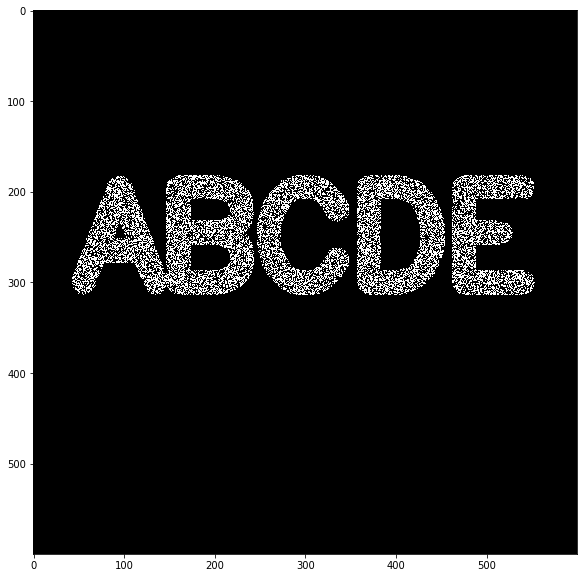

In [52]:
display_img(black_noise_img)

In [53]:
# REmoving the noise from the image.
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

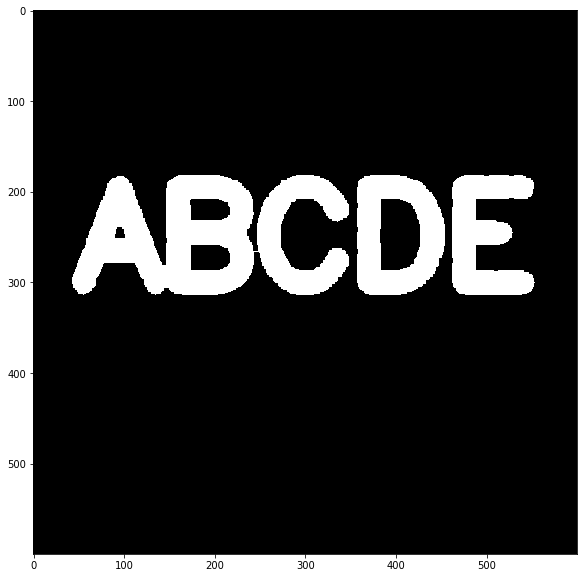

In [54]:
display_img(closing)

**MORPH_GRADIENT**

It takes the difference between dilution and erosion of an image.

Dilution - adds to the image..makes it more bubbly.
Erosion - removes from the image.

In [55]:
img3 = load_img()

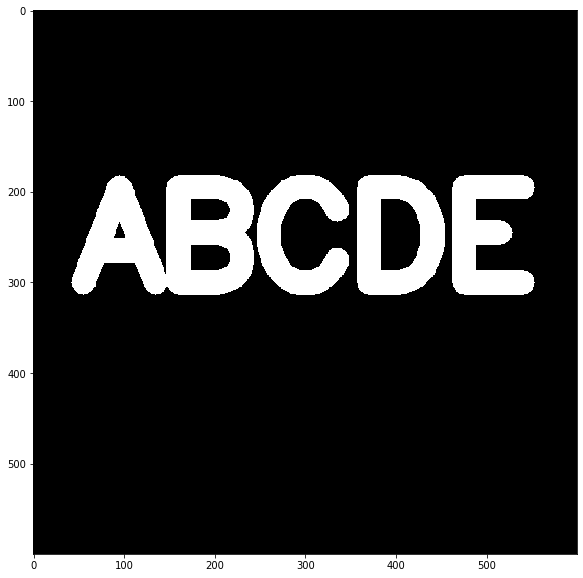

In [56]:
display_img(img3)

In [57]:
gradient = cv2.morphologyEx(img3, cv2.MORPH_GRADIENT, kernel)

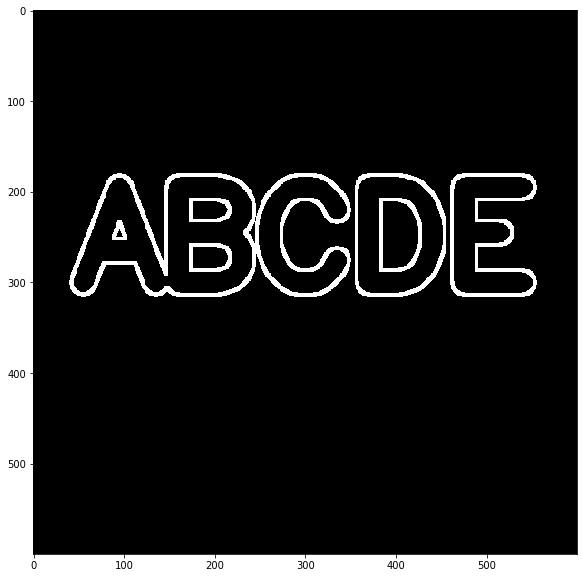

In [58]:
display_img(gradient)